In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Attacks.csv")

df.drop(columns=["Date_reported",],inplace=True)

df.fillna(0,inplace=True)


df["Sever_Location"] = df["Sever_Location"].map({"Asia": 1,"Africa":2,"Europe":3,"Oceania":4,"North America":5,"South America":6,"island":7,"Uncategorized":8})

# df

In [3]:
# weights = [random.randint(0,100),random.randint(0,100),random.randint(0,100),random.randint(0,100)]
bias = 0.01

In [4]:
X = df[['Sever_Location','Packet_Size', 'No._of_Packets', 'Attack_Packets']].values
y = df['Total_Loss(Y)'].values


In [5]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std
m = X.shape[0]
X = np.hstack((np.ones((m, 1)), X))
weights = np.random.rand(X.shape[1])

# print(X)

# print(X.shape[1])

In [6]:
def compute_cost(X, y, weights):
    m = len(y)
    predictions = np.dot(X, weights)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

In [7]:
def gradient_descent(X, y, weights, learning_rate, iterations, print_every=100):
    m = len(y)
    cost_history = []

    for i in range(1, iterations+1):
        predictions = np.dot(X, weights)
        errors = predictions - y
        gradient = (1/m) * np.dot(X.T, errors)
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        if i % print_every == 0 or i == 1:
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return weights, cost_history

In [8]:
iterations = 1000
final_weights, cost_history = gradient_descent(X, y, weights, 0.01, iterations)

print(f"\nMinimum Cost after {iterations} iterations: {cost_history[-1]:.6f}")

Iteration 1: Cost = 5340900838.609377
Iteration 100: Cost = 2281880917.727115
Iteration 200: Cost = 1936442228.311643
Iteration 300: Cost = 1884310487.960556
Iteration 400: Cost = 1875138636.795605
Iteration 500: Cost = 1873423889.220295
Iteration 600: Cost = 1873094707.455985
Iteration 700: Cost = 1873030584.659767
Iteration 800: Cost = 1873017968.144140
Iteration 900: Cost = 1873015465.835239
Iteration 1000: Cost = 1873014965.974307

Minimum Cost after 1000 iterations: 1873014965.974307


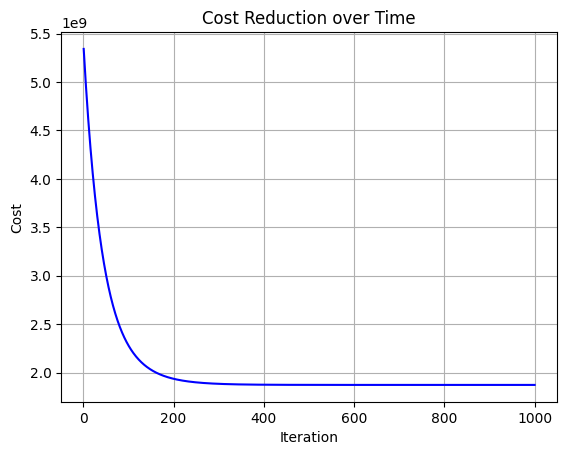

In [9]:
plt.plot(range(1, iterations+1), cost_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Reduction over Time')
plt.grid(True)
plt.show()